
<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/06_advanced_plotting/06_workalong02_mapping.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Mapping

This workalong and exercise introduce mapping in `matplotlib`. We'll build from the figure we created in the first workalong.

In [1]:
""" Check if this notebook is being run in Google Colab """

# if the notebook is being run in google colab, we need to install cartopy in a special way

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
  # install cartopy if it isn't already installed
  try:
    import cartopy
  except:
    # force re-installation of shapely, otherwise cartopy breaks in google colab
    # upgrade pip
    ! pip install --upgrade pip
    # remove the current version of shapely
    ! pip uninstall shapely --yes
    # install shapely and cartopy simultaneously, forcing compilation
    ! pip install --no-binary shapely cartopy
    # install cmocean too
    ! pip install cmocean

In [23]:
""" Import libraries """

import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cmocean #BEAUTIFUL plot colors
import numpy as np
import pandas as pd
import scipy

In [3]:
""" Load the dataset """

input_file = "air.2m.gauss.2021.nc"

# download the data file if needed
import os
if not os.path.exists(input_file):
    url = f"https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis2/gaussian_grid/air.2m.gauss.2021.nc"
    ! curl --output {input_file} {url}

# open the dataset using xarray
temp_ds = xr.open_dataset(input_file, chunks = -1)

""" Calculate the hottest temperature recorded in each season. """

# xarray is built on top of pandas, so we can use groupby for this
season_groups = temp_ds.groupby('time.season')

# calculate the max in each season
season_max_temp = season_groups.max()

# extract temperature (and also use 'squeeze' to remove the pesky single-item level dimension)
max_temp_xr = season_max_temp['air'].squeeze()

# pull out coordinates
seasons = max_temp_xr.season
lat = max_temp_xr.lat
lon = max_temp_xr.lon

# force the calculation
max_temp_xr.load();

In [4]:
max_temp_xr.sel(season = 'DJF').plot
plt.show()

# Cartopy

For mapping, we'll use `cartopy`.  Cartopy defines *projection* as the map projection on which the dataset will be drawn.  It defines the *transform* of the dataset as the projection on which the dataset exists.  They can be the same, but they don't have to be.

Let's just explore projections.

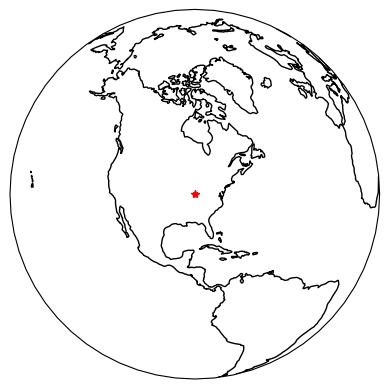

In [14]:

#set coords of bloomington IN
bloomington_lon = -86.526386
bloomington_lat = 39.165325
projection = cartopy.crs.Orthographic(central_longitude=bloomington_lon, central_latitude=bloomington_lat)
transform = cartopy.crs.PlateCarree()#others - mercator?


#create a fig
fig, ax = plt.subplots(subplot_kw = dict(projection = projection))

#drwa continent boundary
ax.coastlines()

#plot a point VERY ROUGHLY corresponding to bloomington IN
ax.plot(bloomington_lon, bloomington_lat, 'r*', transform = transform)

#set a glbal extent
ax.set_global()

plt.show()

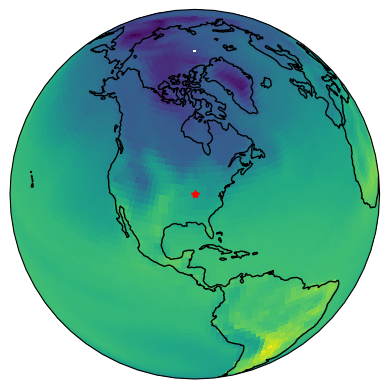

In [15]:
"""Draw data on a map."""
#set coords of bloomington IN
bloomington_lon = -86.526386
bloomington_lat = 39.165325
projection = cartopy.crs.Orthographic(central_longitude=bloomington_lon, central_latitude=bloomington_lat)
transform = cartopy.crs.PlateCarree()


#create a fig
fig, ax = plt.subplots(subplot_kw = dict(projection = projection))

#drwa continent boundary
ax.coastlines()

#draw the DFJ data
max_temp_djf = max_temp_xr.sel(season = 'DJF')
lat = max_temp_djf.lat
lon = max_temp_djf.lon
ax.pcolormesh(lon, lat, max_temp_djf, transform = transform)

#plot a point VERY ROUGHLY corresponding to bloomington IN
ax.plot(bloomington_lon, bloomington_lat, 'r*', transform = transform)

#set a glbal extent
ax.set_global()

plt.show()

In [17]:
#force temp max to load
max_temp_xr.load() #forces to load and won't have to repeat again

<xarray.DataArray 'air' (season: 4, lat: 94, lon: 192)>
array([[[268.97998, 269.01   , 269.03   , ..., 268.88998, 268.91998,
         268.96   ],
        [271.03   , 271.24   , 271.41   , ..., 270.53998, 270.50998,
         270.78998],
        [273.93   , 274.     , 274.03   , ..., 273.26   , 273.6    ,
         273.81   ],
        ...,
        [259.98   , 259.79   , 259.62   , ..., 260.59   , 260.37   ,
         260.16998],
        [259.29   , 259.19   , 259.09   , ..., 259.6    , 259.5    ,
         259.4    ],
        [257.61   , 257.54   , 257.47   , ..., 257.82   , 257.75   ,
         257.68   ]],

       [[274.94   , 274.96   , 274.97   , ..., 274.88998, 274.9    ,
         274.91998],
        [274.87   , 274.86   , 274.84   , ..., 274.88998, 274.88   ,
         274.88   ],
        [275.08   , 275.06   , 275.08   , ..., 275.09998, 275.09   ,
         275.06   ],
...
        [255.26999, 254.98   , 254.68   , ..., 256.13   , 255.84999,
         255.56   ],
        [252.84   , 252.65   , 252.45   , ..., 253.39   , 253.20999,
         253.03   ],
        [248.85   , 248.79   , 248.73   , ..., 248.93   , 248.95   ,
         248.9    ]],

       [[273.63   , 273.48   , 273.49   , ..., 273.78   , 273.78   ,
         273.71   ],
        [273.81   , 273.8    , 273.8    , ..., 273.82   , 273.81   ,
         273.81   ],
        [274.07   , 274.06   , 274.06   , ..., 274.11002, 274.09   ,
         274.08   ],
        ...,
        [255.95999, 255.84   , 255.73   , ..., 257.22   , 256.8    ,
         256.37   ],
        [255.82999, 255.79999, 255.76999, ..., 256.37   , 256.08002,
         255.87   ],
        [253.54999, 253.51   , 253.54999, ..., 253.88998, 253.76999,
         253.65999]]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes: (12/13)
    long_name:      6-Hourly Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    level_desc:     2 m
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    valid_range:    [120. 430.]
    actual_range:   [182.33 327.4 ]

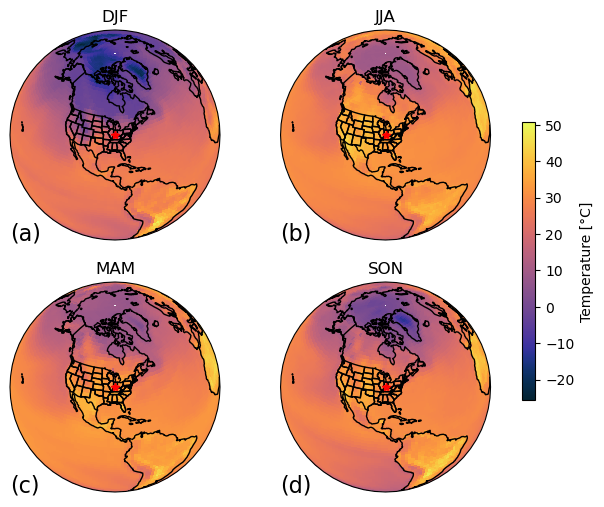

In [55]:
""" Plot the hottest temperature recorded in each season with maplines. """

#set coords of bloomington IN
bloomington_lon = -86.526386
bloomington_lat = 39.165325
projection = cartopy.crs.Orthographic(central_longitude=bloomington_lon, central_latitude=bloomington_lat)
transform = cartopy.crs.PlateCarree()

#SET the colormap
cmap = cmocean.cm.thermal

#create a fig
fig, axs2d = plt.subplots(2, 2, figsize = (8,6), #cartopy auto makes the map size 1 to 1, so changing fig size only imacts space around fig
                       subplot_kw = dict(projection = projection))

#make axs2d object a 1d vector of panels (index starts at upper left)
axs = axs2d.ravel()

#reduce horizontal space between plots (width, w)
#plt.subplots_adjust(wspace = -0.5, hspace = 0)
#this looks cool but I dont need it because i changed the fig size


#SET plot labels 
plot_labels = ["(a)","(b)", "(c)", "(d)"]


#draw the DFJ data
#max_temp_djf = max_temp_xr.sel(season = 'DJF')
#lat = max_temp_djf.lat
#lon = max_temp_djf.lon
#ax.pcolormesh(lon, lat, max_temp_djf, transform = transform)

for ax, season, label in zip(axs, seasons, plot_labels):
    #max temp of THIS season
    max_temp_this_season = max_temp_xr.sel(season = season) - 273.15 #CONVERT TO CELSIUS
    #color plot temp
    cplt = ax.pcolormesh(
        lon, 
        lat, 
        max_temp_this_season,
        cmap = cmap,
        transform = transform
        ) #ADD cplt = #we need this for color bar #ADD cmap = cmap bc defined earlier as ocean



    #ADD season to title
    ax.set_title(str(season.values)) #convert to string so it doesn't look weird

    #manually set tic marks
    #y_ticks = np.arange(-80,100,20)
    #ax.set_yticks(y_ticks)

    #plot a point VERY ROUGHLY corresponding to bloomington IN
    ax.plot(bloomington_lon, bloomington_lat, 'r*', transform = transform)

    #drwa continent boundary
    ax.coastlines()

    #add states/provinces/ stuff
    ax.add_feature(cartopy.feature.STATES)

    #also consider auto
    #ax.set_aspect(auto)

    #add plot labels
    ax.text( 0.0 ,0.0, label, transform = ax.transAxes,
            fontsize = 16,
            color = "black") #last two are opacity


#ADD a color bar
fig.colorbar(cplt, ax = axs, shrink = 0.6, label = "Temperature [°C]")

#set a glbal extent
ax.set_global()

# HAIL mary command for plot spacing
#plt.tight_layout()

plt.show()

**caption**: Max 2m air temp in various seasons with star over bloomington in 2021